### Download the data and remove rows containing null values

In [1]:
# modules.data_module is a module we have created ourselves for useful data functions
import modules.data_module as dm
import pandas as pd

data_url = "https://corgis-edu.github.io/corgis/datasets/csv/graduates/graduates.csv"
data_path = "data/graduates.csv"

# Used to download and save for the first time
# dm.retrieve_data(data_url, save_to_file=True, save_path="data/graduates.csv")

data = dm.retrieve_data(data_path).set_index("Unnamed: 0")
data.index.name = "ID"

# Remove Salaries.Highest or Salaries.Lowest as the Salaries.Mean and Salaries.Median are of interest.
#data = data.drop(["Salaries.Lowest", "Salaries.Highest"], axis=1)
# Keep columns that are of interest.
data = data[["Demographics.Total", "Year", "Salaries.Mean", "Education.Major", "Demographics.Ethnicity.Asians", "Demographics.Ethnicity.Minorities", "Demographics.Ethnicity.Whites", "Demographics.Gender.Females", "Demographics.Gender.Males"]]

# Remove all rows where any column in the row has a value of 0
data = data[(data != 0).all(1)]

# Remove all rows where column not equal to 1993 as 1993 was before the Dotcom Bubble from 1995-2001.
# As we don't have more data before 1993, it wouldn't make sense to use that data as we don't know if the values
# were at peak, lower or the same before then.
data = (data[data['Year'] != 1993])

# Remove all rows where Education.Major is not: 
# Computer Science and Math", "Economics", "Electrical Engineering", "Mechanical Engineering", 
# "Other Engineering", "Chemistry", "Civil Engineering", "Psychology

majors_of_interest = ["Computer Science and Math", "Economics", "Electrical Engineering", "Mechanical Engineering", "Other Engineering", "Chemistry", "Civil Engineering", "Psychology"]
data = data.loc[data['Education.Major'].isin(majors_of_interest)]

# For prediction
data_for_prediction = data.copy();

# The data boolean masking causes decimals on Year. Let's get rid of those by making it a String, as we just need to show the static values (so our plot doesnt show decimal years)
data['Year'] = data['Year'].astype(str).replace('\.0', '', regex=True)

data

,Demographics.Total,Year,Salaries.Mean,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males
ID,,,,,,,,,
49,507228,1995,60697.60,Chemistry,49393,36562,421046,140363,366865
50,345038,1995,51758.63,Civil Engineering,39586,18806,286397,24979,320059
51,1114519,1995,49672.61,Computer Science and Math,87310,103423,923026,401758,712760
52,658039,1995,50778.48,Economics,46146,42052,569841,157069,500970
53,675226,1995,58165.47,Electrical Engineering,88354,42981,543890,36905,638321
...,...,...,...,...,...,...,...,...,...
484,1302458,2015,109940.97,Economics,166195,195133,941130,403424,899034
485,1154661,2015,109173.61,Electrical Engineering,375520,155870,623271,149404,1005257
496,950566,2015,98533.83,Mechanical Engineering,184209,117901,648456,96727,853839


### Plot Salaries.Mean for the majors of interest

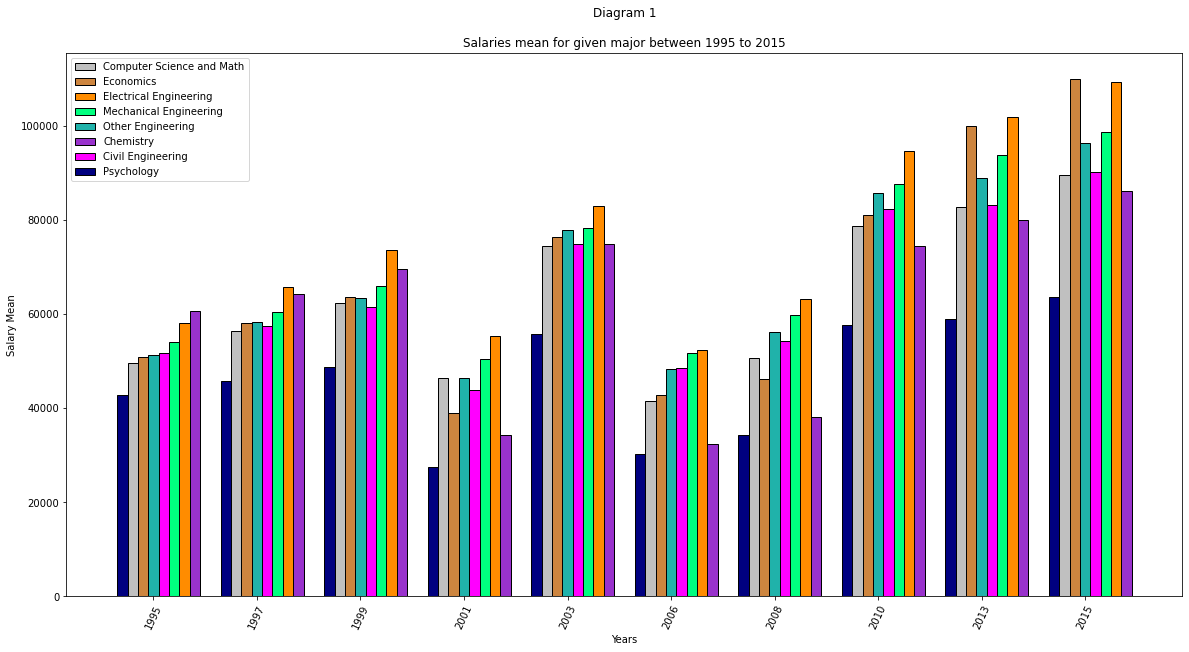

In [2]:
# smp = salary mean plot
smp_data = data
smp_label = "Education.Major"
smp_x = "Year"
smp_y = "Salaries.Mean"
smp_xlabel = "Years"
smp_ylabel = "Salary Mean"
smp_labels = majors_of_interest
smp_title = "Salaries mean for given major between 1995 to 2015"
smp_suptitle = ["Diagram 1"]

dm.bar_data(smp_data, smp_label, smp_x, smp_y, smp_xlabel, smp_ylabel, smp_labels, smp_title, smp_suptitle)

### Observations on the Salary graph for given majors between 1995 to 2015
We can see that certain educations are rising in salary since the start (1995) and up to the end year (2015), such as Electrical Engineering. It could indicate that it has been highly demanded throughout all the years, hence the salary increase.
On the other hand, the salary of the majority of the educations appears to be affected by financial crisis that begun in early 2007. Because of that, most of the educations had a high decrease in the salary during this period, which is also shown on the graph above. But after the financial crisis ending in 2009, the majority of the educations, such as Chemistry, Computer Science and Chemical Engineering are now at a higher salary level than before the crisis.

- Note til os: Lav nogle overordnede konklusioner når vi har de andre grafer med og få den røde tråd frem. Ovenstående er blot "åbenlyse" observationer.

### Plot Demographics.Ethnicity for the majors of interest

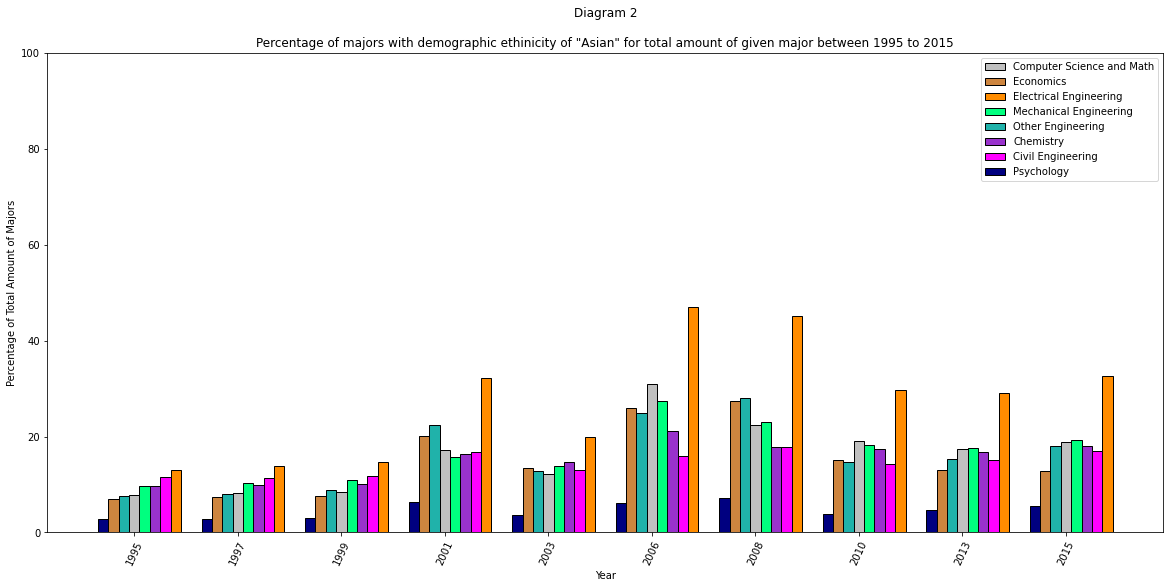

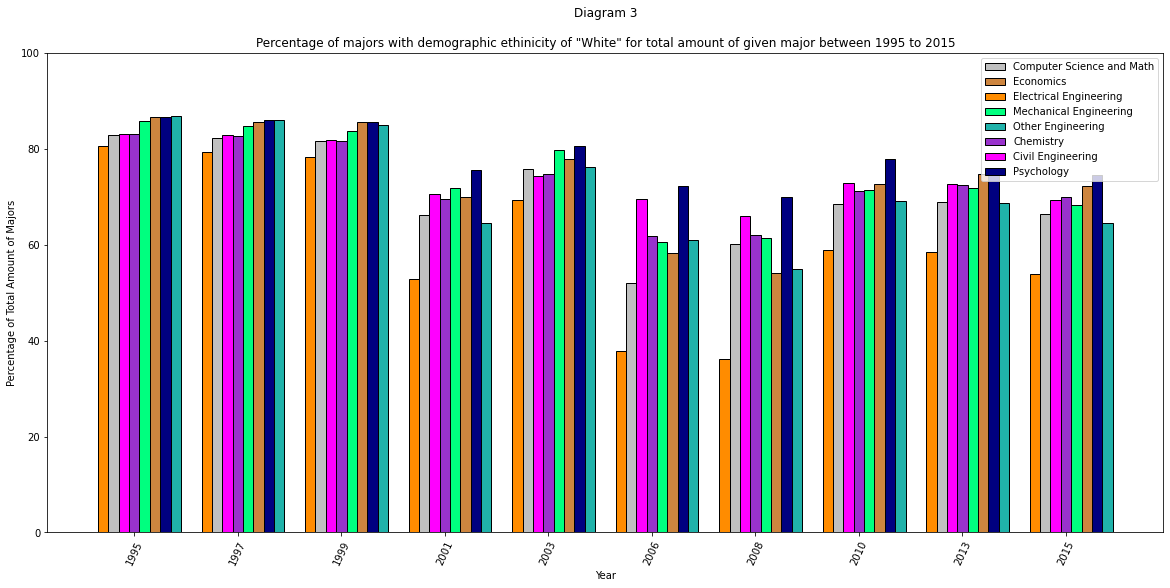

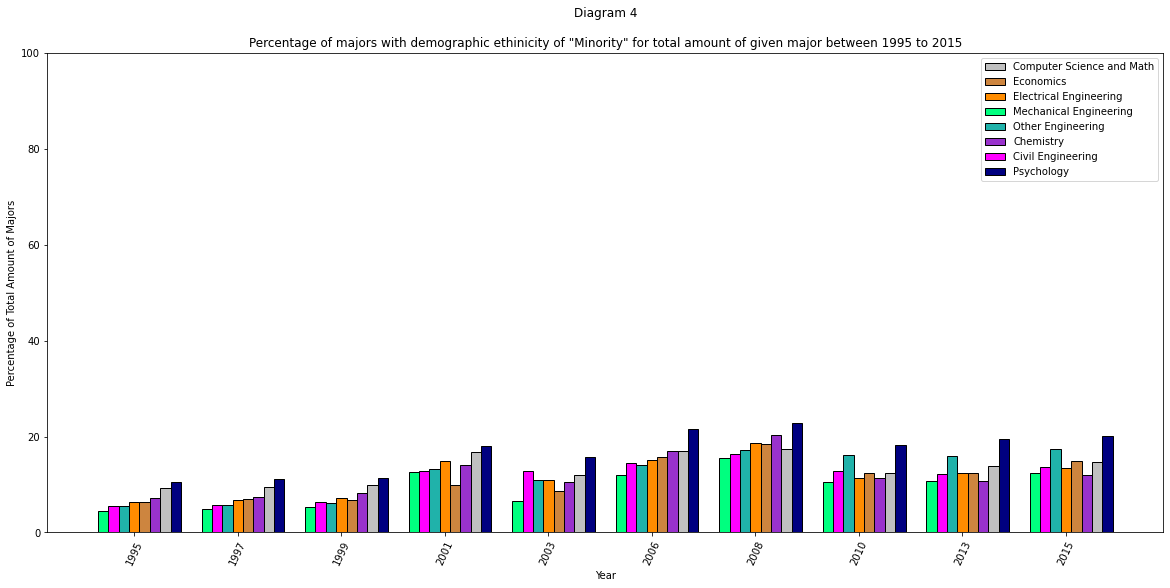

In [3]:
# demographic ethnicity bar
deb_data = data
# create percentage of females and males compared to total demographics
deb_data['asians_percentage'] = dm.create_percentage_column(deb_data, "Demographics.Ethnicity.Asians", "Demographics.Total")
deb_data['whites_percentage'] = dm.create_percentage_column(deb_data, "Demographics.Ethnicity.Whites", "Demographics.Total")
deb_data['minorities_percentage'] = dm.create_percentage_column(deb_data, "Demographics.Ethnicity.Minorities", "Demographics.Total")
deb_label = ["Education.Major", "Education.Major", "Education.Major"]
deb_x = ["Year", "Year", "Year"]
deb_y = ["asians_percentage", "whites_percentage", "minorities_percentage"]
deb_xlabel = ["Year", "Year", "Year"]
deb_ylabel = ["Percentage of Total Amount of Majors", "Percentage of Total Amount of Majors",  "Percentage of Total Amount of Majors"]
deb_labels = majors_of_interest
deb_title = ["Percentage of majors with demographic ethinicity of \"Asian\" for total amount of given major between 1995 to 2015",
              "Percentage of majors with demographic ethinicity of \"White\" for total amount of given major between 1995 to 2015", 
              "Percentage of majors with demographic ethinicity of \"Minority\" for total amount of given major between 1995 to 2015"]
deb_suptitle = ["Diagram 2", "Diagram 3", "Diagram 4"]

dm.bar_data(deb_data, deb_label, deb_x, deb_y, deb_xlabel, deb_ylabel, deb_labels, deb_title, deb_suptitle, 3, y_range=[0,100])

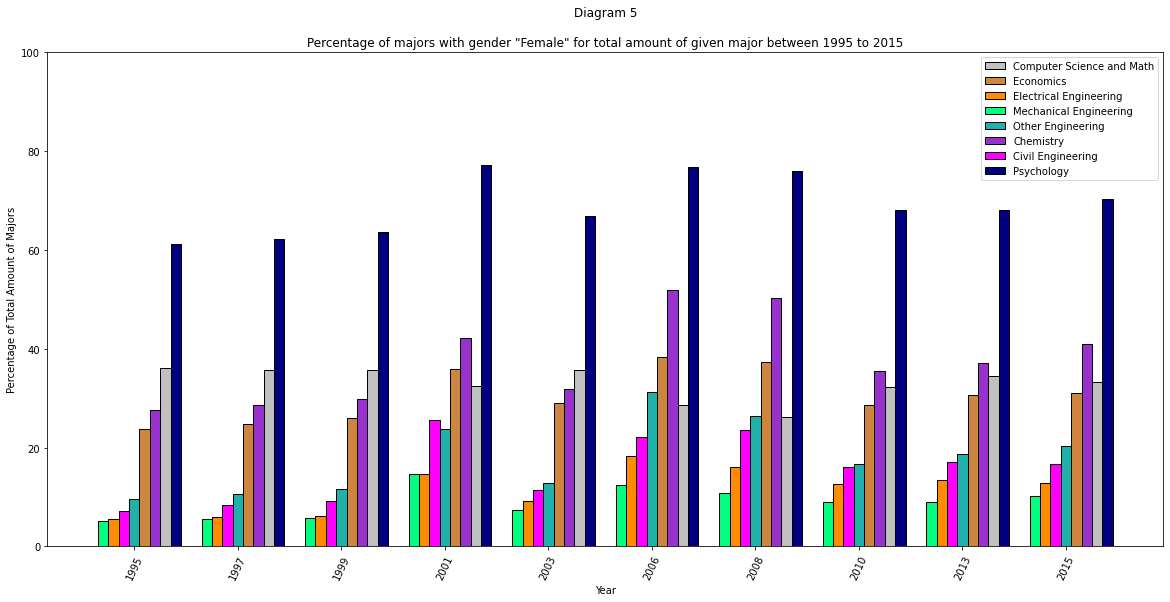

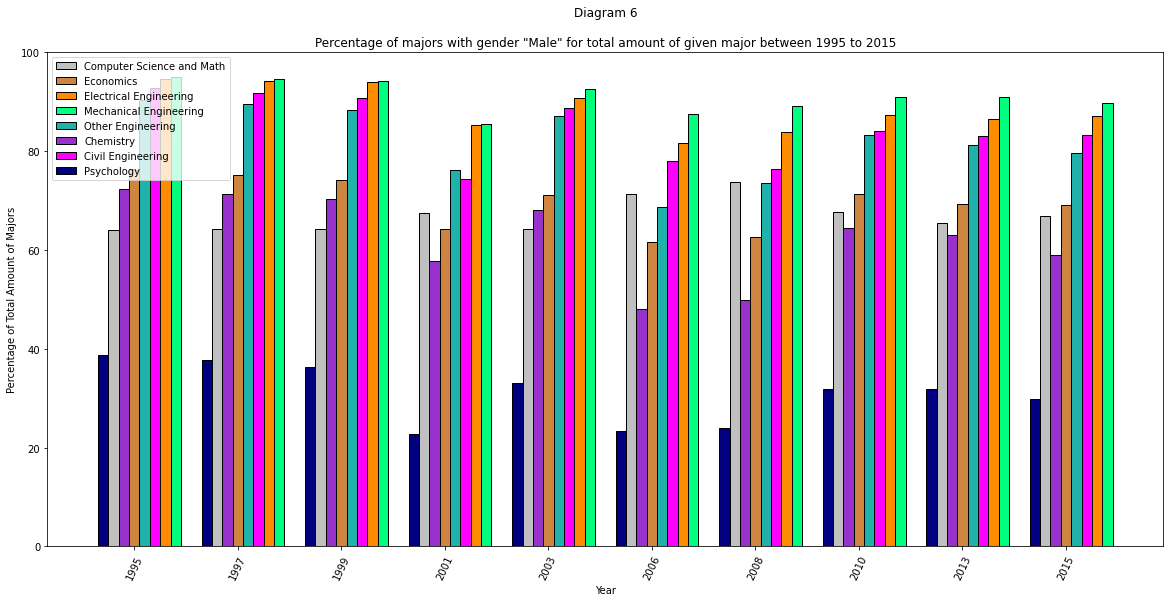

In [4]:
# dgfb = demographics gender female bar
dgfb_data = data
# create percentage of females and males compared to total demographics
dgfb_data['females_percentage'] = dm.create_percentage_column(dgfb_data, "Demographics.Gender.Females", "Demographics.Total")
dgfb_data['males_percentage'] = dm.create_percentage_column(dgfb_data, "Demographics.Gender.Males", "Demographics.Total")
dgfb_label = ["Education.Major", "Education.Major"]
dgfb_x = ["Year", "Year"]
dgfb_y = ["females_percentage", "males_percentage"]
dgfb_xlabel = ["Year", "Year"]
dgfb_ylabel = ["Percentage of Total Amount of Majors", "Percentage of Total Amount of Majors"]
dgfb_labels = majors_of_interest
dgfb_title = ["Percentage of majors with gender \"Female\" for total amount of given major between 1995 to 2015", 
              "Percentage of majors with gender \"Male\" for total amount of given major between 1995 to 2015"]
dgfb_suptitle = ["Diagram 5", "Diagram 6"]
dm.bar_data(dgfb_data, dgfb_label, dgfb_x, dgfb_y, dgfb_xlabel, dgfb_ylabel, dgfb_labels, dgfb_title, dgfb_suptitle, 2, y_range=[0,100])

### Clustering of Data through Meanshift

In [5]:
# Clustering with the following Features below
data_features_for_clustering = data[["Salaries.Mean", "Education.Major", "Demographics.Ethnicity.Asians", "Demographics.Ethnicity.Minorities", "Demographics.Ethnicity.Whites", "Demographics.Gender.Females", "Demographics.Gender.Males"]]
data_features_for_clustering.head()

,Salaries.Mean,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males
ID,,,,,,,
49,60697.60,Chemistry,49393,36562,421046,140363,366865
50,51758.63,Civil Engineering,39586,18806,286397,24979,320059
51,49672.61,Computer Science and Math,87310,103423,923026,401758,712760
52,50778.48,Economics,46146,42052,569841,157069,500970
53,58165.47,Electrical Engineering,88354,42981,543890,36905,638321


In [6]:
from sklearn import preprocessing
import modules.clustering_insert as ci

le=preprocessing.LabelEncoder()
# Store only one Feature - Major, in a (dataset)
dataset_only_major = data[["Education.Major"]].copy()
# Convert the Major feature to categorical value in numeric form
dataset_only_major['Education.Major'] = le.fit_transform(dataset_only_major['Education.Major'].astype(str))

# Let's normalize all other features (than Major now)
dataset_except_major = data_features_for_clustering.copy()
dataset_except_major = dataset_except_major.drop(["Education.Major"], axis=1);



# Normalization
scaled_dataset_except_major = ci.doNormalization(dataset_except_major)
scaled_chosen_dataset = scaled_dataset_except_major.copy()

#Include Major in our scaled dataset
major_list = dataset_only_major['Education.Major'].to_list()
scaled_chosen_dataset['Education.Major'] = major_list

scaled_chosen_dataset.head()

,Salaries.Mean,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Major
0,0.402679,0.098345,0.050294,0.163470,0.057797,0.214747,0
1,0.294250,0.077304,0.023856,0.109242,0.008750,0.186376,1
2,0.268946,0.179696,0.149847,0.365638,0.168909,0.424408,2
3,0.282361,0.091379,0.058468,0.223396,0.064898,0.296033,3
4,0.371965,0.181935,0.059852,0.212945,0.013820,0.379287,4


In [7]:
#Meanshift
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np 

#Below is a helper function to help estimate a good value for bandwith based on the data.
print("Calculate Estimated Bandwidth:", estimate_bandwidth(scaled_chosen_dataset))

analyzer = ci.makeAnalyzer(scaled_chosen_dataset, 1.45)
labels = ci.makeLabelsFromAnalyzer(analyzer)


Calculate Estimated Bandwidth: 1.450997130232634


In [8]:
scaled_chosen_dataset = ci.addClusterGroupToDataSet(scaled_chosen_dataset, labels)
scaled_chosen_dataset

,Salaries.Mean,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Major,cluster_group
0,0.402679,0.098345,0.050294,0.163470,0.057797,0.214747,0,2.0
1,0.294250,0.077304,0.023856,0.109242,0.008750,0.186376,1,2.0
2,0.268946,0.179696,0.149847,0.365638,0.168909,0.424408,2,1.0
3,0.282361,0.091379,0.058468,0.223396,0.064898,0.296033,3,1.0
4,0.371965,0.181935,0.059852,0.212945,0.013820,0.379287,4,0.0
...,...,...,...,...,...,...,...,...
75,1.000000,0.348942,0.286400,0.372929,0.169617,0.537316,3,1.0
76,0.990692,0.798047,0.227939,0.244914,0.061640,0.601702,4,0.0
77,0.861632,0.387591,0.171405,0.255057,0.039248,0.509922,5,0.0
78,0.834379,0.498610,0.335973,0.333192,0.111472,0.622889,6,3.0


In [9]:
ci.calculateAmountOfClusters(analyzer)

Number of estimated clusters : 4


In [10]:
meanshift_data_scaled_clusters = ci.createGrouping(scaled_chosen_dataset)
meanshift_data_scaled_clusters

,Salaries.Mean,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Major,Counts
cluster_group,,,,,,,,
0.0,0.550236,0.235892,0.077125,0.153840,0.020299,0.303383,4.5,20
1.0,0.454548,0.272015,0.161260,0.273316,0.126274,0.376575,2.5,20
2.0,0.431761,0.105815,0.052938,0.107495,0.038047,0.161753,0.5,20
3.0,0.356433,0.162960,0.260480,0.354595,0.252572,0.328415,6.5,20


### Observations on the above cluster data
The data has been put in the following 4 cluster groups:
- 0.0
- 1.0
- 2.0
- 3.0

The mean salary is highest in the 0.0 cluster group and gets lower for each cluster group. 3.0 has the lowest mean salary.

#### cluster_group = 0.0:
- In this cluster group (the wealthiest), it is worth noticing that it has the lowest amount of Females compared to the other groups. 
- This group has a low amount of Minorities, a big amount of Asians, and Whites in between the two groups.

#### cluster_group = 1.0:
- In this cluster group (the second wealthiest), it is worth noticing that there is an equality between Asians and Whites but not with Minorities. 

#### cluster_group = 2.0:
- In this cluster group (the second poorest), it is worth noticing that there is an equality between Asians and Whites but not with Minorities.

#### cluster_group = 3.0:
- In this cluster group (the poorest), it is worth noticing that this is where the most of all the Females and Minorities are. 
- In addition to the above observation it is also worth noticing that the Whites take the lead in this group which was unexpected. However, this makes sense as the whites take up about 80% of the total amount of demographics (see diagram 3 in relation to diagram 2 & 4).

#### Conclusion on all the cluster groups together
- The Females are always unequal compared to the Males in all the groups. 
- The Minorities are more unequal in relation to Asians and Whites.

In [11]:
# Implementing Cluster with two features (Salary + Major)
data_features_2_for_clustering = data[["Salaries.Mean", "Education.Major"]]
data_features_2_for_clustering.head()
#meanshift_data_2

# Start with normalization parts for Mean, and fit for Major.

le2=preprocessing.LabelEncoder()

# Store only one Feature - Major, in a (dataset)
dataset_only_major_2 = data[["Education.Major"]].copy()

dataset_only_major_2['Education.Major'] = le2.fit_transform(dataset_only_major_2['Education.Major'].astype(str))

dataset_except_major_2 = data_features_2_for_clustering.copy()
dataset_except_major_2 = dataset_except_major_2.drop(["Education.Major"], axis=1);

## Normalization
scaled_dataset_except_major_2 = ci.doNormalization(dataset_except_major_2)

scaled_chosen_dataset_2 = scaled_dataset_except_major_2.copy()
#Include Major in our scaled dataset
major_list = dataset_only_major_2['Education.Major'].to_list()
scaled_chosen_dataset_2['Education.Major'] = major_list

scaled_chosen_dataset_2.head()


# Meanshift proceed..
#Below is a helper function to help estimate a good value for bandwith based on the data.
print("Calculate Estimated Bandwidth:", estimate_bandwidth(scaled_chosen_dataset_2))

analyzer2 = ci.makeAnalyzer(scaled_chosen_dataset_2, 1.3)
labels2 = ci.makeLabelsFromAnalyzer(analyzer)


Calculate Estimated Bandwidth: 1.300234624578324


In [12]:
#We will add a new column in dataset which shows the cluster the data of a particular row belongs to.
scaled_chosen_dataset_2 = ci.addClusterGroupToDataSet(scaled_chosen_dataset_2, labels)
scaled_chosen_dataset_2

,Salaries.Mean,Education.Major,cluster_group
0,0.402679,0,2.0
1,0.294250,1,2.0
2,0.268946,2,1.0
3,0.282361,3,1.0
4,0.371965,4,0.0
...,...,...,...
75,1.000000,3,1.0
76,0.990692,4,0.0
77,0.861632,5,0.0
78,0.834379,6,3.0


In [13]:
# Calculate amount of clusters
ci.calculateAmountOfClusters(analyzer)

Number of estimated clusters : 4


In [14]:
meanshift_data_scaled_clusters_2 = ci.createGrouping(scaled_chosen_dataset)
meanshift_data_scaled_clusters_2

,Salaries.Mean,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Major,Counts
cluster_group,,,,,,,,
0.0,0.550236,0.235892,0.077125,0.153840,0.020299,0.303383,4.5,20
1.0,0.454548,0.272015,0.161260,0.273316,0.126274,0.376575,2.5,20
2.0,0.431761,0.105815,0.052938,0.107495,0.038047,0.161753,0.5,20
3.0,0.356433,0.162960,0.260480,0.354595,0.252572,0.328415,6.5,20


### Prediction

In [15]:
# We exclude the following years: (2001, 2003, 2006, 2008) in our first Prediction model. The reason is:
# During these years, there's a high difference in the numbers, 
# due to the financial crisis, and the end of the Dot-com crisis, which makes the predicting model values hard to read. 
# We will however show one prediction with the crisis years included, and one prediction with the crisis years excluded.

import modules.prediction_insert as pi
import matplotlib.pyplot as plt
#Economics and Computer Science

data_for_prediction.drop(columns=['Demographics.Ethnicity.Minorities', 'Demographics.Ethnicity.Whites', 'Demographics.Ethnicity.Asians', 'Demographics.Gender.Males', 'Demographics.Gender.Females'], inplace=True)
#data_for_prediction

# Exclude Crisis Years..
#economics_predict = pi.shouldExcludeYears(True, data_for_prediction, "Economics")

# Include Crisis Years...
economics_predict = pi.shouldExcludeYears(False, data_for_prediction, "Economics")
economics_predict

# Get xs_reshape, and ys
xs_reshape = pi.get_xs_reshape(economics_predict, "Demographics.Total")
ys = pi.get_ys(economics_predict)

# pi.createLinearReg(economics_predict, xs_reshape, ys, "Demographics.Total")

# print("2015 demographics total:", dataset_for_prediction["Demographics.Total"].iloc[-1])
# print("2015 mean salary:", dataset_for_prediction["Salaries.Mean"].iloc[-1])

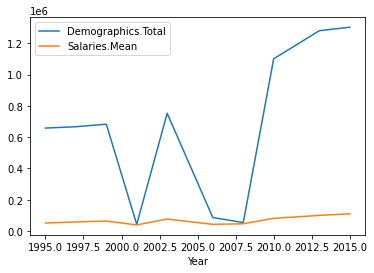

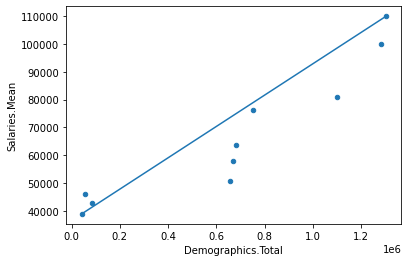

In [16]:
data = economics_predict.copy()

data = data.set_index('Year')
data

data.plot()

data.plot.scatter(x = 0, y = 1)
plt.plot([data['Demographics.Total'].min(), data['Demographics.Total'].max()], [data['Salaries.Mean'].min(), data['Salaries.Mean'].max()])

In [17]:
# Call the model to predict

model = pi.createModel(xs_reshape, ys)
pi.predictByModel(model, xs_reshape, 1324434)
data

Increasing variabale for prediction to 1324434 results in a total salary of 98203.0


,Demographics.Total,Salaries.Mean,Education.Major
Year,,,
1995,658039,50778.48,Economics
1997,666572,58014.40,Economics
1999,683013,63571.99,Economics
2001,41846,38941.96,Economics
2003,752503,76329.57,Economics
2006,85983,42750.66,Economics
2008,54062,46212.60,Economics
2010,1100771,81043.54,Economics
2013,1280482,99932.09,Economics


### Observation of the above prediction
The above prediction shows the predicted mean salary when the demographic total reaches 2.600.000 people. In 2015, the demographic total was 1.302.458 and the mean salary was 109940.97. When 1.324.434 is reached, it is predicted that the mean salary will be 98203.

In [18]:
# Predict salary for females
import modules.prediction_insert as pi

 
# Exclude Crisis Years..
dataset_for_prediction_female = pi.shouldExcludeYears(True, data_for_prediction)
#print(dataset_for_prediction2)
# Include Crisis Years...
#dataset_for_prediction = pi.shouldExcludeYears(False, data_for_prediction)
 
# Get xs_reshape, and ys
xs_reshape = pi.get_xs_reshape(dataset_for_prediction_female, "Demographics.Gender.Females")
ys = pi.get_ys(dataset_for_prediction_female)
 
pi.createLinearReg(dataset_for_prediction_female, xs_reshape, ys, "Demographics.Gender.Females")

TypeError: shouldExcludeYears() missing 1 required positional argument: 'industry'

In [ ]:
model_female = pi.createModel(xs_reshape, ys)
pi.predictByModel(model_female, xs_reshape, 1000000)

In [ ]:
# Predict salary for males
# Exclude Crisis Years..
dataset_for_prediction_male = pi.shouldExcludeYears(True, data_for_prediction)
#print(dataset_for_prediction2)
# Includ Crisis Years...
#dataset_for_prediction = pi.shouldExcludeYears(False, data_for_prediction)

# Get xs_reshape, and ys
xs_reshape = pi.get_xs_reshape(dataset_for_prediction_male, "Demographics.Gender.Males")
ys = pi.get_ys(dataset_for_prediction_male)

pi.createLinearReg(dataset_for_prediction_male, xs_reshape, ys, "Demographics.Gender.Males")

In [ ]:
model_male = pi.createModel(xs_reshape, ys)
pi.predictByModel(model_male, xs_reshape, 1900000)